
##### M14v0.3_Challenge_KonradK_machine_learning_trading_bot.ipynb
### Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
## Module 14 Challenge Submission
---

# Machine Learning Trading Bot


In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas as hv
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import datetime as dt
from finta import TA
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 300)

from sklearn.linear_model import LogisticRegression

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: mport the OHLCV dataset into a Pandas DataFrame.

In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head()

open   high    low  close  volume
date                                                   
2015-01-21 09:30:00  23.83  23.83  23.83  23.83     100
2015-01-21 11:00:00  23.98  23.98  23.98  23.98     100
2015-01-22 15:00:00  24.42  24.42  24.42  24.42     100
2015-01-22 15:15:00  24.42  24.44  24.42  24.44     200
2015-01-22 15:30:00  24.46  24.46  24.46  24.46     200

In [3]:
# Filter the date index and close columns
svm_1_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
svm_1_signals_df["Actual Returns"] = svm_1_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
svm_1_signals_df = svm_1_signals_df.dropna()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

close  Actual Returns
date                                      
2015-01-21 11:00:00  23.98        0.006295
2015-01-22 15:00:00  24.42        0.018349
2015-01-22 15:15:00  24.44        0.000819
2015-01-22 15:30:00  24.46        0.000818
2015-01-26 12:30:00  24.33       -0.005315

close  Actual Returns
date                                      
2021-01-22 09:30:00  33.27       -0.006866
2021-01-22 11:30:00  33.35        0.002405
2021-01-22 13:45:00  33.42        0.002099
2021-01-22 14:30:00  33.47        0.001496
2021-01-22 15:45:00  33.44       -0.000896

## Step 2: Generate trading signals using short- and long-window SMA values. 

In [4]:
# Set the short window and long window
svm_1_short_window = 4
svm_1_long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
svm_1_signals_df['SMA_Fast'] = svm_1_signals_df['close'].rolling(window=svm_1_short_window).mean()
svm_1_signals_df['SMA_Slow'] = svm_1_signals_df['close'].rolling(window=svm_1_long_window).mean()

svm_1_signals_df = svm_1_signals_df.dropna()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow
date                                                          
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463

close  Actual Returns  SMA_Fast  SMA_Slow
date                                                          
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495

In [5]:
# Initialize the new Signal column
svm_1_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
svm_1_signals_df.loc[(svm_1_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
svm_1_signals_df.loc[(svm_1_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow  Signal
date                                                                  
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214     1.0
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308     1.0
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360     1.0
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411     1.0
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463     1.0

close  Actual Returns  SMA_Fast  SMA_Slow  Signal
date                                                                  
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215    -1.0
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445     1.0
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745     1.0
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085     1.0
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495    -1.0

In [6]:
svm_1_signals_df['Signal'].value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [7]:
# Calculate the strategy returns and add them to the svm_1_signals_df DataFrame
svm_1_signals_df['Strategy Returns - SVM'] = svm_1_signals_df['Actual Returns'] * svm_1_signals_df['Signal'].shift()

# Review the DataFrame
display(svm_1_signals_df.head())
display(svm_1_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow  Signal  Strategy Returns - SVM
date                                                                                          
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214     1.0                     NaN
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308     1.0                0.000000
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360     1.0                0.000803
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411     1.0                0.000401
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463     1.0                0.001202

close  Actual Returns  SMA_Fast  SMA_Slow  Signal  Strategy Returns - SVM
date                                                                                          
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215    -1.0               -0.006866
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445     1.0               -0.002405
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745     1.0                0.002099
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085     1.0                0.001496
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495    -1.0               -0.000896

<AxesSubplot:xlabel='date'>

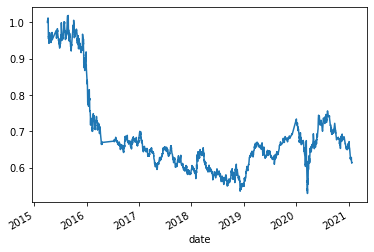

In [8]:
# Plot Strategy Returns to examine performance
svm_1_returns_plot = (1 + svm_1_signals_df['Strategy Returns - SVM']).cumprod().plot()

svm_1_returns_plot

In [9]:
# Plot Strategy Returns to examine performance
svm_1_returns_hvplot = (1 + svm_1_signals_df['Strategy Returns - SVM']).cumprod().hvplot(title="Strategy Returns - SVM", x="date", line_color='lightblue')

svm_1_returns_hvplot

:Curve   [date]   (Strategy Returns - SVM)

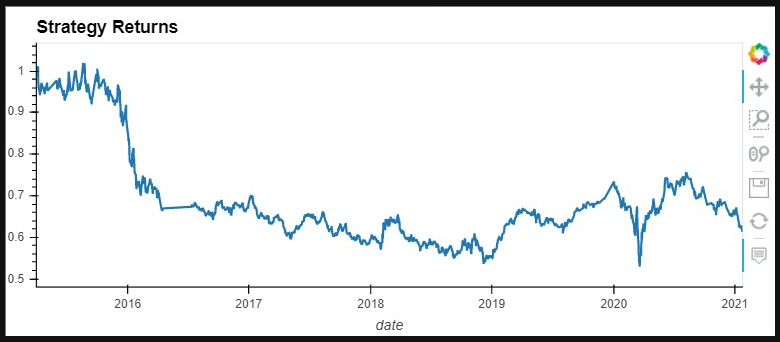

### Step 3: Split the data into training and testing datasets.

In [10]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = svm_1_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

SMA_Fast  SMA_Slow
date                                   
2015-04-02 15:00:00   24.9175   24.3214
2015-04-02 15:15:00   24.9200   24.3308
2015-04-02 15:30:00   24.9250   24.3360
2015-04-02 15:45:00   24.9325   24.3411
2015-04-06 09:30:00   24.9475   24.3463

In [11]:
# Create the target set selecting the Signal column and assiging it to y
y = svm_1_signals_df['Signal']

# Review the value counts
y.value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [12]:
# Select the start of the training period
svm_1_training_begin = X.index.min()

# Display the training begin date
print(svm_1_training_begin)

2015-04-02 15:00:00


In [13]:
# Select the ending period for the training data with an offset of 3 months
svm_1_training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(svm_1_training_end)

2015-07-02 15:00:00


In [14]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[svm_1_training_begin:svm_1_training_end]
y_train = y.loc[svm_1_training_begin:svm_1_training_end]

# Review the X_train DataFrame
X_train.head()

SMA_Fast  SMA_Slow
date                                   
2015-04-02 15:00:00   24.9175   24.3214
2015-04-02 15:15:00   24.9200   24.3308
2015-04-02 15:30:00   24.9250   24.3360
2015-04-02 15:45:00   24.9325   24.3411
2015-04-06 09:30:00   24.9475   24.3463

In [15]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[svm_1_training_end+DateOffset(hours=1):]
y_test = y.loc[svm_1_training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

SMA_Fast  SMA_Slow
date                                   
2015-04-02 15:00:00   24.9175   24.3214
2015-04-02 15:15:00   24.9200   24.3308
2015-04-02 15:30:00   24.9250   24.3360
2015-04-02 15:45:00   24.9325   24.3411
2015-04-06 09:30:00   24.9475   24.3463

In [16]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [17]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_train_scaled)

# Review the model's predicted values
svm_pred[:100]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [18]:
# Use the trained model to predict the trading signals for the testing data.
svm_1_testing_signal_predictions = svm_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
svm_1_testing_report = classification_report(y_test, svm_1_testing_signal_predictions)

# Print the classification report
print(svm_1_testing_report)

              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [19]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
svm_1_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
svm_1_predictions_df['Predicted'] = svm_1_testing_signal_predictions

# Add the actual returns to the DataFrame
svm_1_predictions_df['Actual Returns'] = svm_1_signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
svm_1_predictions_df['Strategy Returns'] = svm_1_predictions_df["Actual Returns"] * svm_1_predictions_df["Predicted"]


# Review the DataFrame
display(svm_1_predictions_df.head(5))
display(svm_1_predictions_df.tail(10))

Predicted  Actual Returns  Strategy Returns
date                                                            
2015-07-06 10:00:00        1.0       -0.025715         -0.025715
2015-07-06 10:45:00        1.0        0.007237          0.007237
2015-07-06 14:15:00        1.0       -0.009721         -0.009721
2015-07-06 14:30:00        1.0       -0.003841         -0.003841
2015-07-07 11:30:00        1.0       -0.018423         -0.018423

Predicted  Actual Returns  Strategy Returns
date                                                            
2021-01-14 15:45:00        1.0        0.006126          0.006126
2021-01-19 09:30:00        1.0        0.009132          0.009132
2021-01-19 11:15:00        1.0       -0.002413         -0.002413
2021-01-19 12:30:00        1.0       -0.003024         -0.003024
2021-01-20 09:45:00        1.0        0.016075          0.016075
2021-01-22 09:30:00        1.0       -0.006866         -0.006866
2021-01-22 11:30:00        1.0        0.002405          0.002405
2021-01-22 13:45:00        1.0        0.002099          0.002099
2021-01-22 14:30:00        1.0        0.001496          0.001496
2021-01-22 15:45:00        1.0       -0.000896         -0.000896

### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<AxesSubplot:title={'center':'Actual vs. Strategy Returns'}, xlabel='date'>

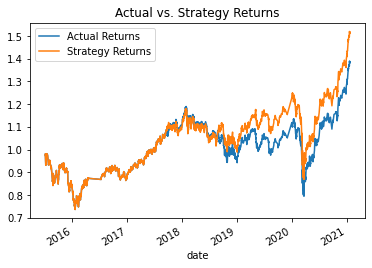

In [20]:
# Plot the actual returns versus the strategy returns
svm_a_v_s_returns_plot = (1 + svm_1_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot(title="Actual vs. Strategy Returns")

svm_a_v_s_returns_plot

In [21]:
# Plot the actual returns versus the strategy returns
svm_a_v_s_returns_hvplot = (1 + svm_1_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().hvplot(title="Actual vs. Strategy Returns - SVM", x="date")

svm_a_v_s_returns_hvplot

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [22]:
# Plot the actual returns versus the strategy returns
actual_returns_hvplot = (1 + svm_1_predictions_df[["Actual Returns"]]).cumprod().hvplot(title="Actual vs. Strategy Returns - SVM", x="date", line_color="lightgray")
# actual_returns_hvplot

In [23]:
# Plot the actual returns versus the strategy returns
svm_returns_hvplot = (1 + svm_1_predictions_df[["Strategy Returns"]]).cumprod().hvplot(title="Actual vs. Strategy Returns - SVM", x="date", line_color="lightblue")
# svm_returns_hvplot

In [24]:
svm_returns_hvplot * actual_returns_hvplot

:Overlay
   .Curve.I  :Curve   [date]   (Strategy Returns)
   .Curve.II :Curve   [date]   (Actual Returns)

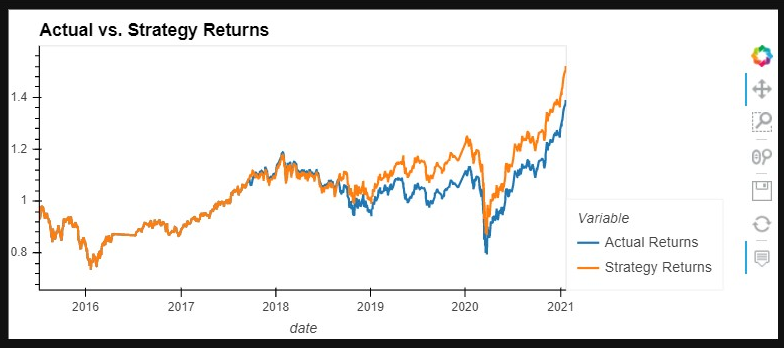

---

## Tune the Baseline Trading Algorithm

## Step 6: Use an Alternative ML Model and Evaluate Strategy Returns

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

---

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file.

In [25]:
# Filter the date index and close columns
svm_t_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
svm_t_signals_df["Actual Returns"] = svm_t_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
svm_t_signals_df = svm_t_signals_df.dropna()

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

close  Actual Returns
date                                      
2015-01-21 11:00:00  23.98        0.006295
2015-01-22 15:00:00  24.42        0.018349
2015-01-22 15:15:00  24.44        0.000819
2015-01-22 15:30:00  24.46        0.000818
2015-01-26 12:30:00  24.33       -0.005315

close  Actual Returns
date                                      
2021-01-22 09:30:00  33.27       -0.006866
2021-01-22 11:30:00  33.35        0.002405
2021-01-22 13:45:00  33.42        0.002099
2021-01-22 14:30:00  33.47        0.001496
2021-01-22 15:45:00  33.44       -0.000896

In [26]:
# Set the short window and long window
svm_t_short_window = 4
svm_t_long_window = 10

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
svm_t_signals_df['Tuned SMA_Fast'] = svm_t_signals_df['close'].rolling(window=svm_t_short_window).mean()
svm_t_signals_df['Tuned SMA_Slow'] = svm_t_signals_df['close'].rolling(window=svm_t_long_window).mean()

svm_t_signals_df = svm_t_signals_df.dropna()

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

close  Actual Returns  Tuned SMA_Fast  Tuned SMA_Slow
date                                                                      
2015-01-27 10:15:00  24.06        0.000416         24.1525          24.252
2015-01-27 10:30:00  24.03       -0.001247         24.0950          24.257
2015-01-27 11:45:00  24.05        0.000832         24.0475          24.220
2015-01-27 14:00:00  24.12        0.002911         24.0650          24.188
2015-01-27 14:15:00  24.15        0.001244         24.0875          24.157

close  Actual Returns  Tuned SMA_Fast  Tuned SMA_Slow
date                                                                      
2021-01-22 09:30:00  33.27       -0.006866         33.2025          32.930
2021-01-22 11:30:00  33.35        0.002405         33.2725          33.014
2021-01-22 13:45:00  33.42        0.002099         33.3850          33.098
2021-01-22 14:30:00  33.47        0.001496         33.3775          33.170
2021-01-22 15:45:00  33.44       -0.000896         33.4200          33.249

In [27]:
# Initialize the new Signal column
svm_t_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
svm_t_signals_df.loc[(svm_t_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
svm_t_signals_df.loc[(svm_t_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

close  Actual Returns  Tuned SMA_Fast  Tuned SMA_Slow  Signal
date                                                                              
2015-01-27 10:15:00  24.06        0.000416         24.1525          24.252     1.0
2015-01-27 10:30:00  24.03       -0.001247         24.0950          24.257    -1.0
2015-01-27 11:45:00  24.05        0.000832         24.0475          24.220     1.0
2015-01-27 14:00:00  24.12        0.002911         24.0650          24.188     1.0
2015-01-27 14:15:00  24.15        0.001244         24.0875          24.157     1.0

close  Actual Returns  Tuned SMA_Fast  Tuned SMA_Slow  Signal
date                                                                              
2021-01-22 09:30:00  33.27       -0.006866         33.2025          32.930    -1.0
2021-01-22 11:30:00  33.35        0.002405         33.2725          33.014     1.0
2021-01-22 13:45:00  33.42        0.002099         33.3850          33.098     1.0
2021-01-22 14:30:00  33.47        0.001496         33.3775          33.170     1.0
2021-01-22 15:45:00  33.44       -0.000896         33.4200          33.249    -1.0

In [28]:
# Calculate the strategy returns and add them to the svm_t_signals_df DataFrame
svm_t_signals_df['Strategy Returns - Tuned SVM'] = svm_t_signals_df['Actual Returns'] * svm_t_signals_df['Signal'].shift()

# Review the DataFrame
display(svm_t_signals_df.head())
display(svm_t_signals_df.tail())

close  Actual Returns  Tuned SMA_Fast  Tuned SMA_Slow  Signal  Strategy Returns - Tuned SVM
date                                                                                                            
2015-01-27 10:15:00  24.06        0.000416         24.1525          24.252     1.0                           NaN
2015-01-27 10:30:00  24.03       -0.001247         24.0950          24.257    -1.0                     -0.001247
2015-01-27 11:45:00  24.05        0.000832         24.0475          24.220     1.0                     -0.000832
2015-01-27 14:00:00  24.12        0.002911         24.0650          24.188     1.0                      0.002911
2015-01-27 14:15:00  24.15        0.001244         24.0875          24.157     1.0                      0.001244

close  Actual Returns  Tuned SMA_Fast  Tuned SMA_Slow  Signal  Strategy Returns - Tuned SVM
date                                                                                                            
2021-01-22 09:30:00  33.27       -0.006866         33.2025          32.930    -1.0                     -0.006866
2021-01-22 11:30:00  33.35        0.002405         33.2725          33.014     1.0                     -0.002405
2021-01-22 13:45:00  33.42        0.002099         33.3850          33.098     1.0                      0.002099
2021-01-22 14:30:00  33.47        0.001496         33.3775          33.170     1.0                      0.001496
2021-01-22 15:45:00  33.44       -0.000896         33.4200          33.249    -1.0                     -0.000896

In [29]:
# Plot Strategy Returns to examine performance
svm_t_returns_hvplot = (1 + svm_t_signals_df['Strategy Returns - Tuned SVM']).cumprod().hvplot(title="Strategy Returns - Tuned SVM", x="date", line_color='darkblue')
# svm_t_returns_hvplot

In [30]:
svm_t_returns_hvplot * actual_returns_hvplot

:Overlay
   .Curve.Strategy_Returns_hyphen_minus_Tuned_SVM :Curve   [date]   (Strategy Returns - Tuned SVM)
   .Curve.I                                       :Curve   [date]   (Actual Returns)

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

---

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

---

---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [31]:
# Import a new classifier from SKLearn
# from sklearn.linear_model import LogisticRegression

# Initiate the model instance
logistic_regression_model = LogisticRegression()

### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [32]:
# Fit the model using the training data
logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
lr_testing_signal_predictions

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [33]:
# Filter the date index and close columns
lr_signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
lr_signals_df["Actual Returns"] = lr_signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
lr_signals_df = lr_signals_df.dropna()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

close  Actual Returns
date                                      
2015-01-21 11:00:00  23.98        0.006295
2015-01-22 15:00:00  24.42        0.018349
2015-01-22 15:15:00  24.44        0.000819
2015-01-22 15:30:00  24.46        0.000818
2015-01-26 12:30:00  24.33       -0.005315

close  Actual Returns
date                                      
2021-01-22 09:30:00  33.27       -0.006866
2021-01-22 11:30:00  33.35        0.002405
2021-01-22 13:45:00  33.42        0.002099
2021-01-22 14:30:00  33.47        0.001496
2021-01-22 15:45:00  33.44       -0.000896

## Step 2: Generate trading signals using short- and long-window SMA values. 

In [34]:
# Set the short window and long window
lr_short_window = 4
lr_long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
lr_signals_df['SMA_Fast'] = lr_signals_df['close'].rolling(window=lr_short_window).mean()
lr_signals_df['SMA_Slow'] = lr_signals_df['close'].rolling(window=lr_long_window).mean()

lr_signals_df = lr_signals_df.dropna()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow
date                                                          
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463

close  Actual Returns  SMA_Fast  SMA_Slow
date                                                          
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495

In [35]:
# Initialize the new Signal column
lr_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
lr_signals_df.loc[(lr_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
lr_signals_df.loc[(lr_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow  Signal
date                                                                  
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214     1.0
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308     1.0
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360     1.0
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411     1.0
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463     1.0

close  Actual Returns  SMA_Fast  SMA_Slow  Signal
date                                                                  
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215    -1.0
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445     1.0
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745     1.0
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085     1.0
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495    -1.0

In [36]:
lr_signals_df['Signal'].value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [37]:
# Calculate the strategy returns and add them to the lr_signals_df DataFrame
lr_signals_df['Strategy Returns - LR'] = lr_signals_df['Actual Returns'] * lr_signals_df['Signal'].shift()

# Review the DataFrame
display(lr_signals_df.head())
display(lr_signals_df.tail())

close  Actual Returns  SMA_Fast  SMA_Slow  Signal  Strategy Returns - LR
date                                                                                         
2015-04-02 14:45:00  24.92        0.000000   24.9175   24.3214     1.0                    NaN
2015-04-02 15:00:00  24.92        0.000000   24.9200   24.3308     1.0               0.000000
2015-04-02 15:15:00  24.94        0.000803   24.9250   24.3360     1.0               0.000803
2015-04-02 15:30:00  24.95        0.000401   24.9325   24.3411     1.0               0.000401
2015-04-02 15:45:00  24.98        0.001202   24.9475   24.3463     1.0               0.001202

close  Actual Returns  SMA_Fast  SMA_Slow  Signal  Strategy Returns - LR
date                                                                                         
2021-01-22 09:30:00  33.27       -0.006866   33.2025  30.40215    -1.0              -0.006866
2021-01-22 11:30:00  33.35        0.002405   33.2725  30.44445     1.0              -0.002405
2021-01-22 13:45:00  33.42        0.002099   33.3850  30.48745     1.0               0.002099
2021-01-22 14:30:00  33.47        0.001496   33.3775  30.53085     1.0               0.001496
2021-01-22 15:45:00  33.44       -0.000896   33.4200  30.57495    -1.0              -0.000896

<AxesSubplot:xlabel='date'>

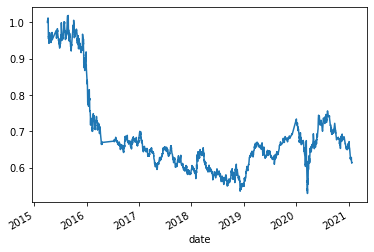

In [38]:
# Plot Strategy Returns to examine performance
lr_returns_plot = (1 + lr_signals_df['Strategy Returns - LR']).cumprod().plot()

lr_returns_plot

In [39]:
# Plot Strategy Returns to examine performance
lr_returns_hvplot = (1 + lr_signals_df['Strategy Returns - LR']).cumprod().hvplot(title="Strategy Returns - LR", x="date", line_color='darkgreen')
# lr_returns_hvplot

In [40]:
lr_returns_hvplot * actual_returns_hvplot

:Overlay
   .Curve.Strategy_Returns_hyphen_minus_LR :Curve   [date]   (Strategy Returns - LR)
   .Curve.I                                :Curve   [date]   (Actual Returns)

### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?

In [41]:
# Use a classification report to evaluate the model using the predictions and testing data
# YOUR CODE HERE
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Print the classification report
# YOUR CODE HERE
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.44      0.33      0.38      1804
         1.0       0.56      0.66      0.61      2288

    accuracy                           0.52      4092
   macro avg       0.50      0.50      0.49      4092
weighted avg       0.51      0.52      0.51      4092



standardize colors

Tune SVM



In [42]:
# Create a new empty predictions DataFrame using code provided below.
fin_predictions_df = pd.DataFrame(index=X_test.index)
fin_predictions_df["svm_1_predicted_signal"] = svm_1_testing_signal_predictions
# fin_predictions_df["svm_t_predicted_signal"] = svm_t_testing_signal_predictions
fin_predictions_df["lr_predicted_signal"] = lr_testing_signal_predictions

fin_predictions_df["Actual Returns"] = svm_1_signals_df["Actual Returns"]



fin_predictions_df["SVM Returns"] = fin_predictions_df["Actual Returns"] * fin_predictions_df["svm_1_predicted_signal"]

fin_predictions_df["Tuned SVM Returns"] = svm_t_signals_df['Strategy Returns - Tuned SVM']

fin_predictions_df["LR Returns"] = fin_predictions_df["Actual Returns"] * fin_predictions_df["lr_predicted_signal"]


fin_predictions_df.head()

svm_1_predicted_signal  lr_predicted_signal  Actual Returns  SVM Returns  Tuned SVM Returns  LR Returns
date                                                                                                                        
2015-07-06 10:00:00                     1.0                  1.0       -0.025715    -0.025715           0.025715   -0.025715
2015-07-06 10:45:00                     1.0                  1.0        0.007237     0.007237          -0.007237    0.007237
2015-07-06 14:15:00                     1.0                  1.0       -0.009721    -0.009721          -0.009721   -0.009721
2015-07-06 14:30:00                     1.0                  1.0       -0.003841    -0.003841           0.003841   -0.003841
2015-07-07 11:30:00                     1.0                  1.0       -0.018423    -0.018423           0.018423   -0.018423

In [43]:
# Plot the actual returns versus the LR strategy returns
fin_predictions_df_hvplot = (1 + fin_predictions_df[["Actual Returns", "SVM Returns", "Tuned SVM Returns", "LR Returns"]]).cumprod().hvplot(title="Actual vs. SVM and LR Strategy Returns", x="date", line_color=(['lightgray', 'lightblue', 'darkblue', 'green']))

fin_predictions_df_hvplot

:NdOverlay   [Variable]
   :Curve   [date]   (value)